In [2]:
from datetime import datetime

import networkx as nx
import json
import re

In [3]:
# needs to be hashable
class Node:
    def __init__(self, span_id, physical_host, execution_time, path, scheme, method, color_level):
        self.span_id = span_id
        self.physical_host = physical_host
        self.execution_time = execution_time
        self.path = path
        self.scheme = scheme
        self.method = method
        self.color_level = color_level

# directed graph (not multi-edges?)
# g = nx.DiGraph()
# g.add_edge(1, 2, weight=3)

# print(g.get_edge_data(1, 2))



In [18]:
def generate_graph(g, span, span_node, color_level, node_levels):
    # key of node levels is level, value is number of nodes on that level
    for child in span["children"]:
        span_id = child["trace_id"]
        physical_host = child["info"]["host"]

        regex_timestamp_start = r"meta.raw_payload.*-start"
        regex_timestamp_stop = r"meta.raw_payload.*-stop"

        for key in child["info"].keys():
            matches_start = re.findall(regex_timestamp_start, str(key))
            matches_stop = re.findall(regex_timestamp_stop, str(key))
            if matches_start:
                timestamp_start = datetime.strptime(
                    child["info"][key]["timestamp"], "%Y-%m-%dT%H:%M:%S.%f"
                )
                if "request" in child["info"][key]["info"]:
                    path = child["info"][key]["info"]["request"]["path"]
                    scheme = child["info"][key]["info"]["request"]["scheme"]
                    method = child["info"][key]["info"]["request"]["method"]
                else:
                    path = ""
                    scheme = ""
                    method = ""
                
                # print(method+" "+scheme+" " +path)

            if matches_stop:
                timestamp_stop = datetime.strptime(
                    child["info"][key]["timestamp"], "%Y-%m-%dT%H:%M:%S.%f"
                )

        delta_seconds = (timestamp_stop - timestamp_start).total_seconds()

        # node_features = [span_id, physical_host, delta_seconds, path, scheme, method]
        # print(node_features)
        child_node = Node(
            span_id=span_id,
            physical_host=physical_host,
            execution_time=delta_seconds,
            path=path,
            scheme=scheme,
            method=method,
            color_level=color_level+1
        )
        if (node_levels.get(color_level)):
            node_levels[color_level] += 1
        else:
            node_levels[color_level] = 1
        g.add_edge(span_node, child_node)
        generate_graph(g, child, child_node, color_level+1, node_levels)

In [7]:
import os 

In [13]:
boot_delete_dir = os.path.join(os.getcwd(), "concurrent data", "traces", "boot_delete")
for filename in os.listdir(boot_delete_dir):
    print(filename)

79107154-1a60-4562-84bb-b57e6e051126.json
ada01616-579e-4bd3-8850-1698c26204ed.json
c2f02287-ac50-47dd-bcc4-281406983ade.json
842c6b32-571a-417c-a961-e3e08494c80f.json
86cf02a0-4e3b-4c5a-8e85-d09292d3370a.json
33685028-2bbe-46f3-b315-5713f08048db.json
d2cd7a7e-7716-4aec-a822-d27c758b7bc4.json
3b3ab592-0546-48a0-8171-18c1ae409911.json
50d3b246-9702-4dcd-a912-b8a1930469f5.json
977ded47-a035-442a-857b-7ebe30b0840b.json
dd0c494b-da82-40c6-af84-5e7450017a20.json
6057da40-afbd-49b3-a929-089de05907d8.json
0129772d-79f8-42a2-9002-01cc494aa3c3.json
41d57f09-1acb-4190-a435-fe8a1c4a3c15.json
a24c1e90-dcdb-43fd-a8ed-aeefd6e644e0.json
45e617ed-0a2d-490e-8e2b-7c4b143d2382.json
4921c147-fa4a-4cec-8b27-154fceb187f5.json
a78fd707-a687-4898-bf8a-4c853db51a98.json
571fd177-a8d2-47c9-a418-b554df229b9c.json
f825ee04-ab73-4f64-b741-b31278916a5d.json
6ff7188d-a545-4a86-adc3-5c7f30b1c00b.json
bd920532-5791-474d-8fe5-9418a9102c51.json
c849123c-27cc-40d8-9cb1-ab01764f4b43.json
334daa82-7e93-4091-a0dd-8b7231e6d0

In [54]:
with open("/Users/milantasevski/fax/rnmp/project/concurrent data/traces/boot_delete/0a1af3c1-f133-49f8-a819-afabc19a4090.json") as read_file:
    json_data = json.load(read_file)
    children = json_data["children"]
    g = nx.DiGraph()
    # base_id = json_data["children"][0]["parent_id"]
    parent_info = json_data["info"]
    # the name is put as an id in the parent node, because there is no other relevant information as in the children
    # the parent node is the first node that doesnt have a parent
    parent_node = Node(span_id=parent_info["name"], physical_host=None, execution_time=None, path = None, scheme=None, method=None, color_level = 0)
    node_levels = {}
    for child in children:
        span_id = child["trace_id"]
        physical_host = child["info"]["host"]

        regex_timestamp_start = r"meta.raw_payload.*-start"
        regex_timestamp_stop = r"meta.raw_payload.*-stop"

        for key in child["info"].keys():
            matches_start = re.findall(regex_timestamp_start, str(key))
            matches_stop = re.findall(regex_timestamp_stop, str(key))
            if matches_start:
                timestamp_start = datetime.strptime(
                    child["info"][key]["timestamp"], "%Y-%m-%dT%H:%M:%S.%f"
                )
                if "request" in child["info"][key]["info"]:
                    path = child["info"][key]["info"]["request"]["path"]
                    scheme = child["info"][key]["info"]["request"]["scheme"]
                    method = child["info"][key]["info"]["request"]["method"]
                else:
                    path = ""
                    scheme = ""
                    method = ""
                # print(method+" "+scheme+" " +path)

            if matches_stop:
                timestamp_stop = datetime.strptime(
                    child["info"][key]["timestamp"], "%Y-%m-%dT%H:%M:%S.%f"
                )

        delta_seconds = (timestamp_stop - timestamp_start).total_seconds()

        # node_features = [span_id, physical_host, delta_seconds, path, scheme, method]
        # print(node_features)
        child_node = Node(
            span_id=span_id,
            physical_host=physical_host,
            execution_time=delta_seconds,
            path=path,
            scheme=scheme,
            method=method,
            color_level = 1
        )
        # we add an edge between the parent node and the child node before procceeding
        node_levels[0] = 1
        g.add_edge(parent_node, child_node)
        generate_graph(g, child, child_node, 1, node_levels)
        #distribution()

    print(node_levels)
    print(g)

{0: 1, 1: 87, 2: 64, 3: 114, 4: 73, 5: 125, 6: 180, 7: 68, 8: 10, 9: 4, 10: 8, 11: 4}
DiGraph with 765 nodes and 764 edges


In [50]:
def graphs_for_folder(folder_name):
    folder = os.path.join(os.getcwd(), "concurrent data", "traces", folder_name)
    graphs = []
    node_level_dicts = []
    for filename in os.listdir(folder):
        with open(os.path.join(folder, filename)) as read_file:
            json_data = json.load(read_file)
            children = json_data["children"]
            g = nx.DiGraph()
            # base_id = json_data["children"][0]["parent_id"]
            parent_info = json_data["info"]
            # the name is put as an id in the parent node, because there is no other relevant information as in the children
            # the parent node is the first node that doesnt have a parent
            parent_node = Node(span_id=parent_info["name"], physical_host=None, execution_time=None, path = None, scheme=None, method=None, color_level = 0)
            node_levels = {}
            for child in children:
                span_id = child["trace_id"]
                physical_host = child["info"]["host"]

                regex_timestamp_start = r"meta.raw_payload.*-start"
                regex_timestamp_stop = r"meta.raw_payload.*-stop"

                for key in child["info"].keys():
                    matches_start = re.findall(regex_timestamp_start, str(key))
                    matches_stop = re.findall(regex_timestamp_stop, str(key))
                    if matches_start:
                        timestamp_start = datetime.strptime(
                            child["info"][key]["timestamp"], "%Y-%m-%dT%H:%M:%S.%f"
                        )
                        if "request" in child["info"][key]["info"]:
                            path = child["info"][key]["info"]["request"]["path"]
                            scheme = child["info"][key]["info"]["request"]["scheme"]
                            method = child["info"][key]["info"]["request"]["method"]
                        else:
                            path = ""
                            scheme = ""
                            method = ""
                        # print(method+" "+scheme+" " +path)

                    if matches_stop:
                        timestamp_stop = datetime.strptime(
                            child["info"][key]["timestamp"], "%Y-%m-%dT%H:%M:%S.%f"
                        )

                delta_seconds = (timestamp_stop - timestamp_start).total_seconds()

                # node_features = [span_id, physical_host, delta_seconds, path, scheme, method]
                # print(node_features)
                child_node = Node(
                    span_id=span_id,
                    physical_host=physical_host,
                    execution_time=delta_seconds,
                    path=path,
                    scheme=scheme,
                    method=method,
                    color_level = 1
                )
                # we add an edge between the parent node and the child node before procceeding
                g.add_edge(parent_node, child_node)
                generate_graph(g, child, child_node, 1, node_levels)
            node_level_dicts.append((filename, node_levels))
            graphs.append(g)
    return graphs, node_level_dicts

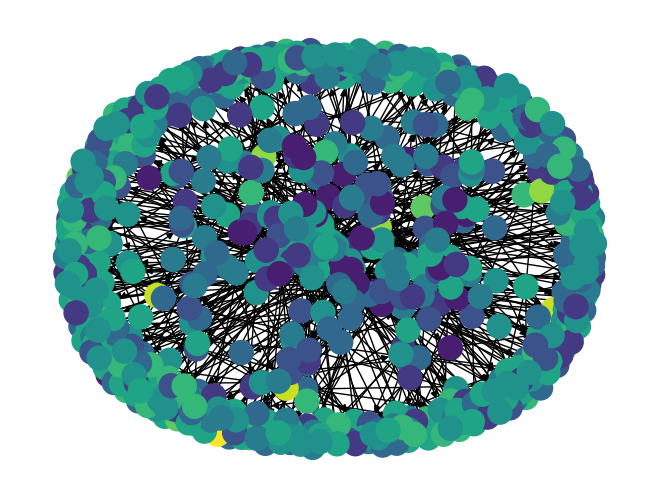

In [21]:
color_map = []
for node in g:
    # if node.color_level == 0:
    #     color_map.append(0.1)
    # elif node.color_level == 1:
    #     color_map.append(0.4)
    # elif node.color_level == 2:
    #     color_map.append(0.7)
    # elif node.color_level == 3:
    #     color_map.append(0.8)
    # else:
    #     color_map.append(1)
    color_map.append(node.color_level)
nx.draw(g, node_color=color_map)

Distribucija na deltite za sekoj node, za da vidime dali treba da se deli grafot

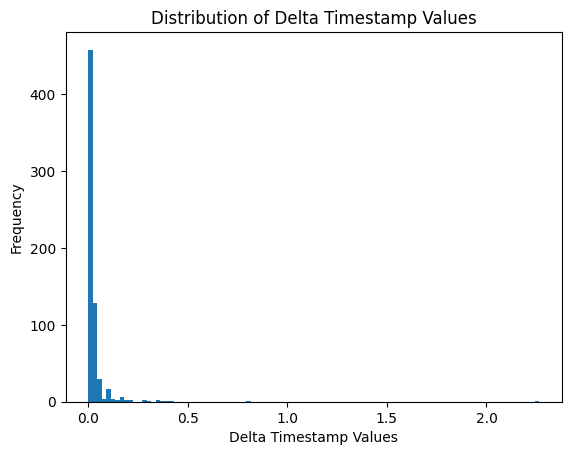

In [39]:
import matplotlib.pyplot as plt

delta_values = [node.execution_time for node in g.nodes if node.execution_time is not None]

plt.hist(delta_values, bins=100)
plt.xlabel('Delta Timestamp Values')
plt.ylabel('Frequency')
plt.title('Distribution of Delta Timestamp Values')
plt.show()

Distribucija na node levels za sekoj graf:

In [51]:
def distribution_for_folder(folder_name):
    _, node_level_dicts = graphs_for_folder(folder_name)
    depths = [len(dict[1].keys()) for dict in node_level_dicts]
    print(depths)
    plt.hist(depths, bins=15)
    plt.xlabel('Depths')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Graph Depths from {folder_name}')
    plt.show()

[2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 

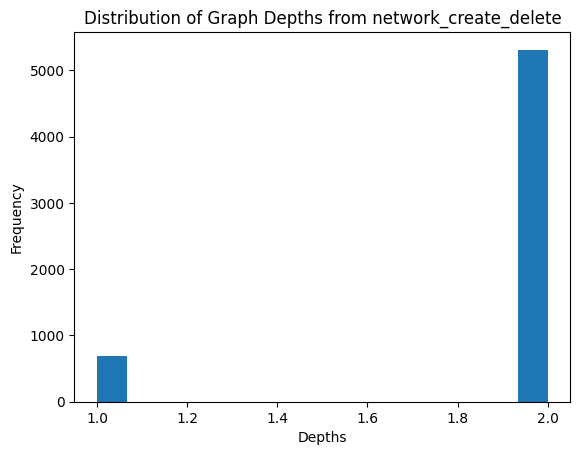

In [57]:
distribution_for_folder("network_create_delete")

In [64]:
def generate_sample_graph_depth_distribution_from_folder(dictionary, title):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    plt.bar(range(len(dictionary)), values, tick_label=keys)
    plt.title(title)
    plt.show()

In [65]:
_, node_level_dicts = graphs_for_folder("network_create_delete")

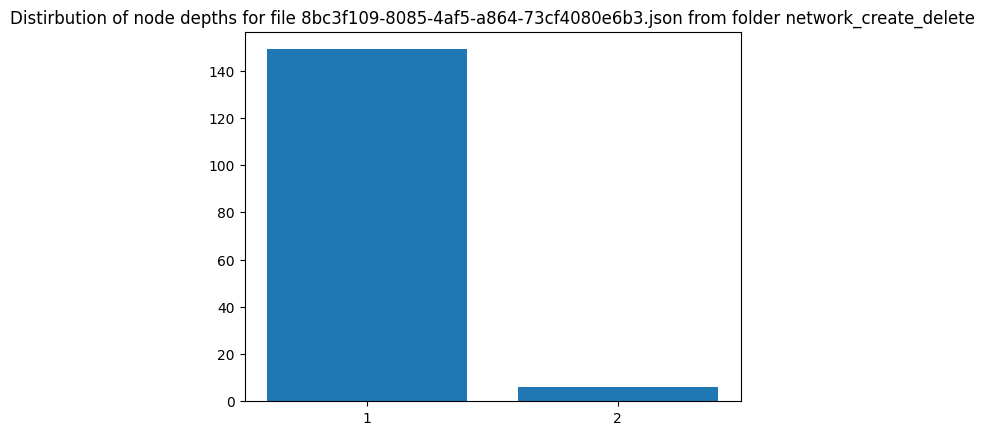

In [66]:

generate_sample_graph_depth_distribution_from_folder(node_level_dicts[1][1], "Distirbution of node depths for file "+node_level_dicts[1][0]+" from folder network_create_delete")

In [ ]:
import os, json

In [ ]:
def trace_ids_with_anomaly(file_name: str):
    all_traces_with_error = []
    report = os.path.join(os.getcwd(), "concurrent data", "reports", file_name)
    report_json = json.load(open(report))
    for data in report_json["tasks"][0]["subtasks"][0]["workloads"][0]["data"]:
        if len(data["error"]) != 0:
            all_traces_with_error.append(data["output"]["complete"][0]["data"]["trace_id"])
    return all_traces_with_error

In [ ]:
trace_ids_with_anomaly("output_image.json")

Pri gradenje na grafot, treba da se proveruva dali id-to e vo ovaa lista
Ako e, oznaci go grafot kako anomalichen

In [ ]:
def graphs_for_folder(folder_name):
    folder = os.path.join(os.getcwd(), "concurrent data", "traces", folder_name)
    graphs = []
    node_level_dicts = []
    anomalies = trace_ids_with_anomaly("output_" + folder_name.split("_")[0] + ".json")
    for filename in os.listdir(folder):
        with open(os.path.join(folder, filename)) as read_file:
            json_data = json.load(read_file)
            children = json_data["children"]
            g = nx.DiGraph()
            # add property on the graph
            # base_id = json_data["children"][0]["parent_id"]
            parent_info = json_data["info"]
            g.graph["type"] = "anomaly" if filename.split(".")[0] in anomalies else "normal"

            # the name is put as an id in the parent node, because there is no other relevant information as in the children
            # the parent node is the first node that doesnt have a parent
            parent_node = Node(span_id=parent_info["name"], physical_host=None, execution_time=None, path = None, scheme=None, method=None, color_level = 0)
            node_levels = {}
            for child in children:
                span_id = child["trace_id"]
                physical_host = child["info"]["host"]

                regex_timestamp_start = r"meta.raw_payload.*-start"
                regex_timestamp_stop = r"meta.raw_payload.*-stop"

                for key in child["info"].keys():
                    matches_start = re.findall(regex_timestamp_start, str(key))
                    matches_stop = re.findall(regex_timestamp_stop, str(key))
                    if matches_start:
                        timestamp_start = datetime.strptime(
                            child["info"][key]["timestamp"], "%Y-%m-%dT%H:%M:%S.%f"
                        )
                        if "request" in child["info"][key]["info"]:
                            path = child["info"][key]["info"]["request"]["path"]
                            scheme = child["info"][key]["info"]["request"]["scheme"]
                            method = child["info"][key]["info"]["request"]["method"]
                        else:
                            path = ""
                            scheme = ""
                            method = ""
                        # print(method+" "+scheme+" " +path)

                    if matches_stop:
                        timestamp_stop = datetime.strptime(
                            child["info"][key]["timestamp"], "%Y-%m-%dT%H:%M:%S.%f"
                        )

                delta_seconds = (timestamp_stop - timestamp_start).total_seconds()

                # node_features = [span_id, physical_host, delta_seconds, path, scheme, method]
                # print(node_features)
                child_node = Node(
                    span_id=span_id,
                    physical_host=physical_host,
                    execution_time=delta_seconds,
                    path=path,
                    scheme=scheme,
                    method=method,
                    color_level = 1
                )
                # we add an edge between the parent node and the child node before procceeding
                g.add_edge(parent_node, child_node)
                generate_graph(g, child, child_node, 1, node_levels)
            node_level_dicts.append((filename, node_levels))
            graphs.append(g)
    return graphs, node_level_dicts

In [ ]:
graphs, _, = graphs_for_folder("network_create_delete")

In [ ]:
len(graphs)

In [ ]:
len([g for g in graphs if g.graph["type"] == "anomaly"])